<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_06_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of data

**Problem:**

Give an examlpe for each of the following types of data (consult lecture notes if needed)

* Nominal
* Ordinal
* Interval
* Ratio

Think which operations are possible on each of this types (consider table from lecture notes if needed).
Think what ambiguity cares applying "unsupport" operations on data, try coming up with about some neat example.


#Population and sample

###Problem:

Complete the following function to generate random population of zeros and ones that contains given number of zeros.

In [0]:
import numpy as np
np.random.seed(0)

def generate_population(num_zeros, num_ones):
  # Enter your code here
  
print(generate_population(3, 2))

####Solution

In [0]:
import numpy as np
np.random.seed(0)

def generate_population(num_zeros, num_ones):
  population = np.hstack([np.ones(num_ones), np.zeros(num_zeros)])
  np.random.shuffle(population)
  return population

print(generate_population(3, 2))

[0. 1. 1. 0. 0.]


###Problem:

Complete the following function that should generate all possible samples from given population (with replacement!).
Do not use populations larger than 5 for testing (*subproblem:* think why).

In [0]:
import numpy as np
import itertools

def generate_samples(population, elems_in_sample):
  # Enter your code here


test_arr = np.array([1, 0, 1])
samples = generate_samples(test_arr, 2)
print(samples)

####Solution

In [0]:
import numpy as np
import itertools

def generate_samples(population, elems_in_sample):
  return np.array(list(itertools.product(population, repeat=elems_in_sample)))


test_arr = np.array([1, 0, 1])
samples = generate_samples(test_arr, 2)
print(samples)

[[1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]]


###Problem:

Complete the following function that should calculate percentage of ones in a given array of zeros and ones.

In [0]:
import numpy as np

def percentage_of_ones(array):
  # Enter your code here

test_array = np.array([[1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1], [1, 0], [1, 1]])
print(percentage_of_ones(test_array))

####Solution

In [0]:
import numpy as np

def percentage_of_ones(array):
  return np.sum(array, axis = 1)/array.shape[1]

test_array = np.array([[1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [1, 1], [1, 0], [1, 1]])
print(percentage_of_ones(test_array))

[1.  0.5 1.  0.5 0.  0.5 1.  0.5 1. ]


###Problem

Collect previously created functions into a single module.
Changing sample size, size of population and percentage of ones in population, see plots until you get intuitive feeling how different can be samples depending on this parameters.

In [0]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import itertools

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])


def generate_population(num_zeros, num_ones):
  # Enter your code here

def generate_samples(population, elems_in_sample):
  # Enter your code here

def percentage_of_ones(array):
  # Enter your code here

def draw_histogram(array, n_bins):
  plt.hist(array, range=[0.0, 1.0], alpha=0.5, density=True, bins=np.linspace(-0.5, n_bins + 0.5, num=(n_bins+2))/n_bins);

slider_population = widgets.IntSlider(min=1, max=5, value=5, description='population size')
slider_sample = widgets.IntSlider(min=1, max=5, value=3, description='sample size')
slider_ones = widgets.IntSlider(min=0, max=5, value=3, description='ones in population')

widgets.dlink((slider_population, 'value'), (slider_sample, 'max'))
widgets.dlink((slider_population, 'value'), (slider_ones, 'max'))

#display(slider_population, slider_sample, slider_ones)

def plot_histos(population_size, sample_size, num_ones):
  population = generate_population(population_size - num_ones, num_ones)
  samples = generate_samples(population, sample_size)
  population_percentage = percentage_of_ones(population[np.newaxis, :])
  samples_percentage = percentage_of_ones(samples)
  draw_histogram(population_percentage, population_size)
  draw_histogram(samples_percentage, sample_size)
  
interact(plot_histos, population_size=slider_population, sample_size=slider_sample, num_ones=slider_ones);

####Solution

In [0]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import itertools

# Properties for plots
plt.style.use([{
      "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])


def generate_population(num_zeros, num_ones):
  population = np.hstack([np.ones(num_ones), np.zeros(num_zeros)])
  np.random.shuffle(population)
  return population

def generate_samples(population, elems_in_sample):
  return np.array(list(itertools.product(population, repeat=elems_in_sample)))

def percentage_of_ones(array):
  return np.sum(array, axis = 1)/array.shape[1]

def draw_histogram(array, n_bins):
  plt.hist(array, range=[0.0, 1.0], alpha=0.5, density=True, bins=np.linspace(-0.5, n_bins + 0.5, num=(n_bins+2))/n_bins);

slider_population = widgets.IntSlider(min=1, max=5, value=5, description='population size')
slider_sample = widgets.IntSlider(min=1, max=5, value=3, description='sample size')
slider_ones = widgets.IntSlider(min=0, max=5, value=3, description='ones in population')

widgets.dlink((slider_population, 'value'), (slider_sample, 'max'))
widgets.dlink((slider_population, 'value'), (slider_ones, 'max'))

#display(slider_population, slider_sample, slider_ones)

def plot_histos(population_size, sample_size, num_ones):
  population = generate_population(population_size - num_ones, num_ones)
  samples = generate_samples(population, sample_size)
  population_percentage = percentage_of_ones(population[np.newaxis, :])
  samples_percentage = percentage_of_ones(samples)
  draw_histogram(population_percentage, population_size)
  draw_histogram(samples_percentage, sample_size)
  
interact(plot_histos, population_size=slider_population, sample_size=slider_sample, num_ones=slider_ones);

interactive(children=(IntSlider(value=5, description='population size', max=5, min=1), IntSlider(value=3, desc…

#Probability distribution of an estimator

Consider mean values of different samples of certain size generated from population given.
See that mean value may vary significantly.
The following code builds histogram (probability distribution) for a random sample to have certain mean value.
The algorithm I have provided is a bit complicated -- it takes advantage of the fact that data in the population does not vary significantly, thus not so many sums arise compared to the number of all possible samples that can be generated.
(A "starred" problem: can you think of a population which samples all have different mean value?)
It's ok if you find the following code difficult, just ignore technical details and consider plots.
Changing sizes of samples, get some intuitive feeling
* what happens, when the sample size grows?
* can you be certain about population's mean value basing on the given sample only?

In [0]:
###### EXAMPLE ######
#
# Estimating mean value of the population
# 1. See that different samples have different means
# 2. See that estimator has its own distribution
# 3. see how distribution changes with size of samples
#
#####################

import itertools
import statistics
import matplotlib.pyplot as plt

import ipywidgets as widgets
import numpy as np

def generate_histogram(size):
  all_sums = {e:1 for e in population}
  for _ in range(size-1):
    tmp = {}
    for el in population:
      for sum_,cnt_ in all_sums.items():
        s = sum_ + el
        if s in tmp:
          tmp[s] += cnt_
        else:
          tmp[s] = cnt_
    all_sums = tmp
  all_means = [s/size for s in all_sums.keys()]
  norm = size / sum(all_sums.values())
  heights = [s*norm for s in all_sums.values()]
  return all_means, heights


population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def plot_histos(size1, size2):
  plt.figure(figsize=(10,8))
  sample1_bins, sample1_heights = generate_histogram(size1)
  plt.bar(sample1_bins, sample1_heights, alpha=0.5, width=1/size1)
  sample2_bins, sample2_heights = generate_histogram(size2)
  plt.bar(sample2_bins, sample2_heights, alpha=0.5, width=1/size2)
  h = np.max([np.max(sample2_heights), np.max(sample1_heights)])
  plt.plot([np.mean(population), np.mean(population)], [0, h], 'm--',linewidth = 2.0)
  plt.xlabel('mean of a sample', fontsize=16)
  plt.ylabel('probability', fontsize=16)
  plt.title('probabilities to get different means', fontsize=20)
  plt.legend(["true mean", "sample 1", "sample 2"], loc=2)
  

slider_sample_1 = widgets.IntSlider(min=1, max=10, value=1, description='sample 1 size')
slider_sample_2 = widgets.IntSlider(min=1, max=10, value=2, description='sample 2 size')

widgets.interact(plot_histos, size1=slider_sample_1, size2=slider_sample_2);

interactive(children=(IntSlider(value=1, description='sample 1 size', max=10, min=1), IntSlider(value=2, descr…

#Distributions

Consider the following distributions.
For each distribution do the following:
* find in the code given, how probability mass function is calculated
* find in the code given, how random sample with given distribution is drawn
* change parameters in the visualization until you get intuitive feeling how the form of the curve depends on the parameters given
* "Starred" problem 1: create block of code and draw PMF on your own (no interaction is needed, just plot the curve)
* "Starred" problem 2: generate and print a small sample for the distribution given

##Binomial distribution

$$
f(k)={n \choose k}p^k(1-p)^{n-k}
$$

Binomial distribution with parameters $n$ and $p$ is the probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $1-p$).
A single success/failure experiment is also called a Bernoulli trial. 

In [0]:
import numpy as np
from scipy.stats import binom

def pmf_for_plotting(n, p):
  k = np.arange(0, n + 1)
  P_binom = binom.pmf(k, n, p)
  return k, P_binom

def sample_distribution(n, p, samples):
  return binom.rvs(size=samples, n=n, p=p)

In [0]:
#@title Binomial Distribution

import json
from IPython.display import display, clear_output
from scipy.spatial import Delaunay

def distribution_data():  
  #print(p, n, s)
  result_k = []
  result_P = []
  result_H = []
  for n in range(31):
    n_fixed_k = []
    n_fixed_P = []
    n_fixed_H = []
    for p in np.linspace(0.0, 1.0, num=10):
      k, P = pmf_for_plotting(n, p)
      x = sample_distribution(n, p, 30)
      #print('cycle')
      n_fixed_k.append(k.tolist())
      n_fixed_P.append(P.tolist())
      n_fixed_H.append(x.tolist())
      #for samples in range(100):
    result_k.append(n_fixed_k)
    result_P.append(n_fixed_P)
    result_H.append(n_fixed_H)
  #print(result_k)
  return IPython.display.JSON({'k': result_k, 'p': result_P, 'x': result_H})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">
  
    var params = null;

   function plot_histogram(x, cell_for_plot)
   {
     var data = [{
       x: x,
       type: 'histogram',
       histnorm: 'probability'
     }];

    Plotly.plot(cell_for_plot, data);
   }

   function plot_scatter(s_x, s_y, cell_for_plot)
   {
     //cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           type: 'scatter',
           mode: 'lines+markers',
           marker: {
             size: 4,
             color: 'red', //colors,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     var layout = {
          title: 'Binomial Distribution',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
        };
    Plotly.newPlot(cell_for_plot, data, layout);
   }


    var buffer = false;
    var histogram = true;

    async function calculate() 
    {
      var ep = document.getElementById("p_val");
      var p = ep.value;
      var en = document.getElementById("n_val");
      var n = en.value;
      var es = document.getElementById("s_val");
      var s = es.value;
      ep = document.getElementById("p_label");
      ep.innerHTML = p / 10.0;
      en = document.getElementById("n_label");
      en.innerHTML = n;
      es = document.getElementById("s_label");
      es.innerHTML = s;

      if (buffer == false) {
        const result = await google.colab.kernel.invokeFunction('notebook.distribution_data', [], {});
        buffer = result.data['application/json'];
      }
      cell_for_plot = document.getElementById('for_plotly_plot');
      plot_scatter(buffer.k[n][p-1], buffer.p[n][p-1], cell_for_plot);
      if (histogram)
        plot_histogram(buffer.x[n][p-1].slice(0, s), cell_for_plot);
    }

    function show_histogram()
    {
        var checkBox = document.getElementById("show_histo");
        var text = document.getElementById("samples");

        if (checkBox.checked == true){
          text.style.display = "block";
          histogram = true;
        } else {
          text.style.display = "none";
          histogram = false;
        }
        calculate();
    }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>

  <div style="position:absolute; top:200px; left:625px;">
  <p>

$$
f(k)={n \choose k}p^k(1-p)^{n-k}
$$

  </p>
  <table>
  <tr><td>\[p:\]</td><td><input type="range" min="1" max="10" value="5" class="slider" id="p_val" oninput="calculate()"></td><td><div id="p_label"></div></td></tr>
  <tr><td>\[n:\]</td><td><input type="range" min="1" max="30" value="15" class="slider" id="n_val" oninput="calculate()"></td><td><div id="n_label"></div></td></tr>
  <tr><td colspan=3>Show histogram <input type="checkbox" id="show_histo" onclick="show_histogram()" checked="checked" /></td></tr>
  </table>
  <table id="samples">
  <tr><td># of samples:</td><td><input type="range" min="1" max="30" value="15" class="slider" id="s_val" oninput="calculate()"></td><td><div id="s_label"></div></td></tr>
  </table>
   
  </div>

<div>
  
<script>
calculate();

</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.distribution_data', distribution_data)

##Poisson

The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space.

$$
f(k)=\frac{\lambda^k}{k!}e^{-\lambda}
$$

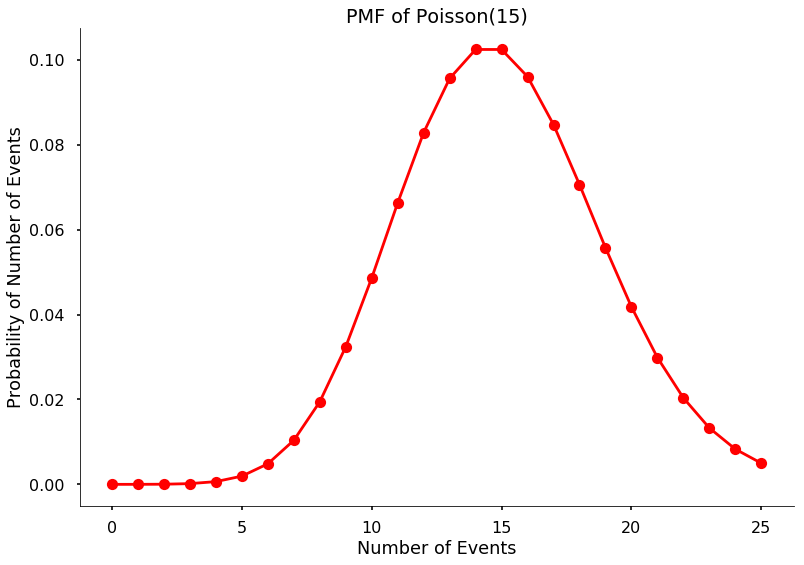

In [0]:
from scipy.stats import bernoulli, binom, poisson
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

@widgets.interact(n=(0,50),samples=(1,1000),λ=(0.0,30.0))
def f(n, λ, samples=100,histogram=False):
    k = np.arange(0, n+1)
    P_poisson = poisson.pmf(k, λ)
    plt.plot(k, P_poisson, '-o', color='r')
    if histogram:
        height,y = np.histogram(poisson.rvs(size=samples,mu=λ), range=(0,n), bins=n+1, density=True)
        plt.bar(k,height,color='b')
    plt.title('PMF of Poisson(%i)' %λ)
    plt.xlabel('Number of Events')
    plt.ylabel('Probability of Number of Events')
    plt.show()

##Exponential distribution

You have met differential equation

$$
\frac{dN}{dt}=-\lambda t
$$

that has solution

$$
N(t)=N_0e^{-\lambda t}.
$$

Its the law that governs radioactive decay, density distribution in the uniform gravitational field and capacitor dicharge. 
If we normalise this function we obtain exponential probability distribution

$$
f(f)=
\begin{cases}
\lambda e^{-\lambda t} & \quad x\geq0 \\
0 & \quad x<0
\end{cases}.
$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

@widgets.interact(lam=(0.01,10.0,0.01), SampleSize=(1,1000), continous_update=False)
def f(lam, SampleSize=100, histogram=False):
  x_max = 40
  x = np.arange(0, x_max, x_max/1000)
  y = lam*np.exp(-lam*x)
  z = 1 - np.exp(-lam*x)
  # Plot the PDF
  plt.plot(x, y, linewidth = 3.0, label = 'PDF')
  if histogram:
   samples = scipy.stats.expon.rvs(1/lam, size=SampleSize)
   plt.hist(samples, bins=30, density=True)
  plt.xlim([0,x_max])
  plt.title("Exponential({})".format(lam))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

interactive(children=(FloatSlider(value=5.0, description='lam', max=10.0, min=0.01, step=0.01), IntSlider(valu…

##Normal distribution

$$
f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

The central limit theorem states that under certain (fairly common) conditions, the sum of many random variables will have an approximately normal distribution. When measuring any physical quantaity random errors sum up thus resulting Gaussian distribution of the measured quantity.
Its mean and variance are

$$
E=\mu \\
Var=\sigma^2.
$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

# Plots pdf of a normal distribution
@widgets.interact(mu=(-25.0,25.0), var=(0.3,30.0))
def plot_pdf(mu, var):
    '''
    Takes mean, variance, range of x and y axes, and whether CDF desired.
    Plots PDF, and optionally CDF.
    '''
    x = np.linspace(-50, 50, 1001)
    sig = var**0.5
    P_norm = scipy.stats.norm.pdf(x, mu, sig)
    
    plt.plot(x, P_norm, 'b', linewidth=3.0, label = "PDF")
    y0 = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5)
    ym = 1/(sig*np.sqrt(2*np.pi))
    plt.plot([mu-sig, mu-sig], [0, y0], 'm--',linewidth = 2.0)
    plt.plot([mu+sig, mu+sig], [0, y0], 'm--', linewidth = 2.0, label = '$\mu\pm\sigma$')
    plt.plot([mu,mu], [0,ym], 'g--', linewidth = 2.0, label = r'$\mu$')
    
    plt.title('PDF of N({},{})'.format(mu,var))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mu', max=25.0, min=-25.0), FloatSlider(value=15.15, …

#Different estimators

##Central tendency estimators

* Find estimators for mean, median, and mode for a sample given.
* "Starred" problem: Generate data with meadian less than mean and data with mean less than median. Think about skewed data. 
* "Starred" problem 2: Generate more or less uniform set of points and calculate mean and median. Add one outlier. Calculate mean and median again. Draw conclusion how do outliers influence these estimators.


In [0]:
import numpy as np
import statistics

sample = [1, 1, 1, 3, 4, 5, 6, 8]

# Enter your code here

###Solution

In [0]:
import numpy as np
import statistics

sample = [1,1,1,3,4,5,6,8]

print("sample mean = ", statistics.mean(sample))
print("sample median = ", statistics.median(sample))
print("sample mode = ", statistics.mode(sample))

##Variance estimators

For a given sample, calculate
* range
* 25-th, 50-th, and 75-th percentiles
* IQR
* "Starred" problem: Think why $IQR(sample)$ is always less than $Range(sample)$?

In [0]:
import numpy as np
import statistics

sample = [2,3,4, 2, 7, 1, 34] 

# Enter your code here

###Solution

In [0]:
import numpy as np
import statistics

sample = [2,3,4, 2, 7, 1, 34] 

print("50th percentile = ", np.percentile(sample, 50)) 
print("25th percentile = ", np.percentile(sample, 25)) 
print("75th percentile = ", np.percentile(sample, 75)) 
print("IQR = ", np.percentile(sample, 75) - np.percentile(sample, 25)) 

50th percentile =  3.0
25th percentile =  2.0
75th percentile =  5.5
IQR =  3.5


##Biased and unbiased sample variances

Explore the code below and do the following
* Find part of the code that calculates variance of the sample
* Consider how biased and unbiased versions are calculated
* Study how histograms and mean variances change with the sample size. 
    - Does biased estimator get better when the sample size increases? 
    - What else can you mention about these two estimators?



In [0]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

@widgets.interact(n=(2, 20))
def Normal_Variance(n):
# n: sample size
# s: number of experiments
# ddof: degree of freedom
#     ddof=0: calculate "raw" variance 
#     ddof=1: calculate unbiased variance 
    plt.figure(figsize=(12, 8))
    plt.xlim([0, 4])
    
    s = 1000000
    X = np.random.normal(0, 1, [n,s])
    
    V = np.var(X, axis=0, ddof=0)
    v = np.mean(V)
    Vu = np.var(X, axis=0, ddof=1)
    vu = np.mean(Vu)
    
    
    counts, bins, bars = plt.hist(V, bins=60, density=True, alpha=0.5);
    h = np.max(counts)
    counts, bins, bars = plt.hist(Vu, bins=60, density=True, alpha=0.5);
    hu = np.max(counts)
    plt.plot([v,v], [0, np.max([h, hu])], 'r--', linewidth = 2.0)
    plt.plot([vu,vu], [0, np.max([h, hu])], 'b-', linewidth = 1.0)

    plt.plot([1,1], [0, np.max([h, hu])], 'g:', linewidth = 3.0)
    plt.ylabel('frequency', fontsize = 15)
    plt.grid()
    plt.title('histogram of sample variances with sample size n=%d'%n, fontsize = 15)
    plt.xlabel('"$S^2$"', fontsize = 15)
    plt.legend(['biased variance', 'unbiased variance', 'population variance', 'biased variances', 'unbiased variances'])

interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output()), _dom_classes=('widget-in…

##Corrected std

Consider the following code and
* Find part of the code that performs sample std calculation
* Find parameter corresponding to correction
* Consider from lecture notes what is correction
* Changing parameters gain some intuition on how correction influences estimator
* The underlying distribution is normal distribution (find part of the code that generates it) thus correction coefficient $1.5$ should make estimator unbiased (for this distribution only!). check this statement

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

def Normal_SD(n, d):
# n: sample size
# s: number of experiments

    plt.figure(figsize=(12,8))
    plt.xlim([0,3])
    plt.title('histogram of sample standard deviation with sample size n=%d'%n, fontsize = 15)
    plt.xlabel('$\hat{\sigma}$', fontsize = 15)
    
    s = 1000000
    X = np.random.normal(0, 1, [n, s])
    V = np.sqrt(np.var(X, axis=0, ddof=d))
    v = np.mean(V)
    
    plt.plot([v,v], [0, 2], 'r--', linewidth = 2.0)
    plt.hist(V, bins=60, density=True);

    plt.plot([1,1], [0, 2], 'g:', linewidth = 2.0)
    plt.ylabel('frequency', fontsize = 15)
    plt.grid() 
    
    plt.legend(["estimated $\sigma$", "true $\sigma$", "$\sigma$ histogram" ])
    
    ax2 = plt.axes([0.65, 0.2, 0.2, 0.4])
    x = np.linspace(-10, 10, 1001)
    P_norm = scipy.stats.norm.pdf(x, 0, 1)
    ax2.plot(x, P_norm)
    plt.title("Population distribution")
    
    
widgets.interact(Normal_SD,
    n = widgets.IntSlider(min=2, max=10, description='n=', step=1, value=2),
    d = widgets.FloatSlider(min=-1.0, max=2.0, description='d=', value=0.0));

interactive(children=(IntSlider(value=2, description='n=', max=10, min=2), FloatSlider(value=0.0, description=…

##Maximum likelihood estimation

Consider the code below and do the following
* Undestand plots
* Experiment with parameters until you gain intuition how MLE works (at least for normal distribution)
* Find $\mu_{MLE}$ and $\sigma_{MLE}$ for the normaly distributed iids analytically
* "Starred" problem: implement your result in code

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])


def generate_sample(var, mu, sample_size):
  sig = np.sqrt(var)
  return scipy.stats.norm.rvs(mu, sig, size=sample_size)

def plot_sample(sample):
  plt.plot(sample, np.zeros_like(sample), 'o', color='r', alpha=0.8)

def plot_norm_distribution(var, mu, color='b'):
  x = np.linspace(-50, 50, 1001)
  sig = np.sqrt(var)
  y = scipy.stats.norm.pdf(x, mu, sig)
  plt.plot(x, y, color, linewidth=3.0)

def plot_sampled(var, mu, sample):
  sig = np.sqrt(var)
  y = scipy.stats.norm.pdf(sample, mu, sig)
  for x_, y_ in zip(sample, y):
    plt.plot([x_, x_], [0, y_], 'm--',linewidth = 2.0)
  plt.plot(sample, y, 'o', color='b', alpha=1.0)
  
def get_likelihood(sample, mu, var):
  sig = np.sqrt(var)
  return np.sum(np.log(scipy.stats.norm.pdf(sample, mu, sig)))

def plot_likelihoods(sample, var):
  mu = np.linspace(-50, 50, 1001)
  l = [get_likelihood(sample, mu_, var) for mu_ in mu]
  plt.plot(mu, l, 'b', linewidth=3.0)


var = 160.0
mu = 0.0
old_sample_size = 1
sample = np.array([])

button = widgets.Button(value=False, description='Generate sample', icon='check')
slider_mu = widgets.FloatSlider(min=-50.0, max=50.0, value=0.0, description='mu')
slider_sample = widgets.IntSlider(min=1, max=30, value=3, description='sample size')


@button.on_click
def plot_on_click(b):
  global sample
  sample = generate_sample(var, mu, old_sample_size)
  if slider_mu.value > 0.0:
    slider_mu.value = slider_mu.value - 1E-10
  else: 
    slider_mu.value = slider_mu.value + 1E-10

def plot_likelihood_estimator(mu_test, sample_size):
  global old_sample_size
  global sample
  if old_sample_size != sample_size:
    sample = generate_sample(var, mu, sample_size)
    old_sample_size = sample_size

  plt.subplot(1, 2, 1)
  plt.title('PDF')
  plot_sample(sample)
  plot_norm_distribution(var, mu_test)
  plot_norm_distribution(var, mu, color='r')
  plot_sampled(var, mu_test, sample)

  plt.subplot(1, 2, 2)
  plt.title('Log of likelihood')
  plot_likelihoods(sample, var)
  plt.plot(mu_test, get_likelihood(sample, mu_test, var), 'o', color='b', alpha=1.0);


display(button)
widgets.interact(plot_likelihood_estimator, mu_test=slider_mu, sample_size=slider_sample);  



Button(description='Generate sample', icon='check', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.0, description='mu', max=50.0, min=-50.0), IntSlider(value=3, descri…

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])


def generate_sample(sig, mu, sample_size):
  return scipy.stats.norm.rvs(mu, sig, size=sample_size)

def plot_sample(sample):
  plt.plot(sample, np.zeros_like(sample), 'o', color='r', alpha=0.8)

def plot_norm_distribution(sig, mu, color='b'):
  x = np.linspace(-50, 50, 1001)
  y = scipy.stats.norm.pdf(x, mu, sig)
  plt.plot(x, y, color, linewidth=3.0)

def plot_sampled(sig, mu, sample):
  y = scipy.stats.norm.pdf(sample, mu, sig)
  for x_, y_ in zip(sample, y):
    plt.plot([x_, x_], [0, y_], 'm--',linewidth = 2.0)
  plt.plot(sample, y, 'o', color='b', alpha=1.0)
  
def get_likelihood(sample, mu, sig):
  return np.prod((scipy.stats.norm.pdf(sample, mu, sig)))

def plot_likelihoods(sample, mu):
  sig = np.linspace(0.1, 100, 1001)
  l = [get_likelihood(sample, mu, sig_) for sig_ in sig]
  plt.plot(sig, l, 'b', linewidth=3.0)


sig = 10.0
mu = 0.0
old_sample_size = 1
sample = np.array([])

button = widgets.Button(value=False, description='Generate sample', icon='check')
slider_sig = widgets.FloatSlider(min=0.1, max=30.0, value=0.1, description='sigma')
slider_sample = widgets.IntSlider(min=1, max=30, value=3, description='sample size')


@button.on_click
def plot_on_click(b):
  global sample
  sample = generate_sample(sig, mu, old_sample_size)
  if slider_sig.value > 10.0:
    slider_sig.value = slider_sig.value - 1E-10
  else: 
    slider_sig.value = slider_sig.value + 1E-10

def plot_likelihood_estimator(sig_test, sample_size):
  global old_sample_size
  global sample
  if old_sample_size != sample_size:
    sample = generate_sample(sig, mu, sample_size)
    old_sample_size = sample_size

  plt.subplot(1, 2, 1)
  plt.title('PDF')
  plot_sample(sample)
  plot_norm_distribution(sig_test, mu)
  plot_norm_distribution(sig, mu, color='r')
  plot_sampled(sig_test, mu, sample)

  plt.subplot(1, 2, 2)
  plt.title('Likelihood')
  plot_likelihoods(sample, mu)
  plt.plot(sig_test, get_likelihood(sample, mu, sig_test), 'o', color='b', alpha=1.0);


display(button)
widgets.interact(plot_likelihood_estimator, sig_test=slider_sig, sample_size=slider_sample);  



Button(description='Generate sample', icon='check', style=ButtonStyle())

interactive(children=(FloatSlider(value=0.1, description='sigma', max=30.0, min=0.1), IntSlider(value=3, descr…

#Correlation

* Consider the following code & review the lecture's part on Covariance and correlation
* Change parameters and observe what happens to the correlation coefficient. Gain intuition on how differently correlated variables look like in scatter plot.
   - Feature -- box with infinite supply of features
   - Drag & Drop features on the field, observe changes in correlation coefficient
   - Dropping feature outside the field removes it


**Theory (excerpt from the lecture)**

Suppose you have two samples drawn from two populations (random variables).
Covariance is a measure of the relationship between these samples. The metric evaluates how much – to what extent – the variables change together.

$$
\begin{aligned}
unbiased:\qquad &\sigma(x,y)=\frac{1}{N-1}\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y}), \\
biased:\qquad &\sigma(x,y)=\frac{1}{N}\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y}).
\end{aligned}
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_06_statistics/correlation.png)

Note that 

$$
\rho(x,x)=\sigma_x^2
$$

Correlation also measures the strength of the relationship between samples. Correlation is the scaled measure of covariance. It is dimensionless. In other words, the correlation coefficient is always a pure value and not measured in any units.

$$
\rho(x,y)=\frac{\sigma(x,y)}{\sigma_x \sigma_y}.
$$

Note also that unlike covariation correllation coefficient is scale invariant, that means that if

$$
x^{\prime}_i=\alpha \, x_i, \\
y^{\prime}_i=\beta \, y_i.
$$

we have

$$
\sigma(x^{\prime}, y^{\prime}) \neq \sigma(x, y),
$$

while

$$
\rho(x^{\prime}, y^{\prime}) = \rho(x, y).
$$

That means that correlation captures inherent linear relation between variables that is not dependent on the choise of scale.

Correlation coefficient is also known as Pearson correlation coefficient (PCC).
Informally you can think about $\rho(x,y)$ as a cosine of angle between two ''vectors''


$$
\cos{\alpha}=\frac{\bar{x}\bar{y}}{|\bar{x}||\bar{y}|}.
$$

Note that

$$
\rho(x,x)=\frac{\sigma_x^2}{\sigma_x \sigma_x}=1.
$$

Function ```corrcoef``` from  ```numpy``` gives matrix

$$
\begin{pmatrix}
\rho(x,x)=1 & \rho(x,y) \\
\rho(y,x) & \rho(y,y)=1 
\end{pmatrix}
$$

In [0]:
#@title Correlation of 2D points

import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(200, 0, 0, 0.65)';
      ctx.fill();
    }
    
    function mean(idx) {
      var sum = 0.0;
      var num = 0;
      if (active_pt && active_pt[0] > 0 && active_pt[0] < 600 && active_pt[1] > 0 && active_pt[1] < 600) {
        sum = active_pt[idx];
        num = 1;
      }
      all_pts.forEach(function (item, index) {
          sum += item[idx];
          num += 1;
        });
      return sum / num;
    }

    function correlation(m_x, m_y) {
      cov_xy = 0.0;
      s_x2 = 0.0;
      s_y2 = 0.0;
      if (active_pt && active_pt[0] > 0 && active_pt[0] < 600 && active_pt[1] > 0 && active_pt[1] < 600) {
        dx = active_pt[0] - m_x;
        dy = active_pt[1] - m_y;
        cov_xy = dx * dy;
        s_x2 = dx * dx;
        s_y2 = dy * dy;
      }
      all_pts.forEach(function (item, index) {
          dx = item[0] - m_x;
          dy = item[1] - m_y;
          cov_xy += dx * dy;
          s_x2 += dx * dx;
          s_y2 += dy * dy;
        });
      return - cov_xy / Math.sqrt(s_x2 * s_y2);
    }
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        ctx.strokeRect(650, 175, 100, 50);
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText('Correlation: ', 650, 200);
        ctx.fillText(debug_txt, 200, 200);

        var m_x = mean(0);
        var m_y = mean(1);
        ctx.fillStyle = 'rgba(0, 0, 200, 0.3)';
        ctx.fillRect(m_x, m_y, 600-m_x, 600-m_y);
        ctx.fillRect(0, 0, m_x, m_y);
        ctx.fillStyle = 'rgba(200, 0, 0, 0.2)';
        ctx.fillRect(m_x, 0, 600-m_x, m_y);
        ctx.fillRect(0, m_y, m_x, 600-m_y);

        var corr = correlation(m_x, m_y);
        ctx.fillStyle = 'black';
        ctx.fillText(corr.toFixed(5), 650, 220);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }
  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px; border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
  </div>
  <script> init();</script>
'''

  
display(IPython.display.HTML(main_str))

#Simpson's paradox

Consider history of two hospitals: A and B.
Say any of them has at least two survived and two dead patients.
* Find such splitting into groups that A seems better than B overall, but worth comparing Group1 and Group2.
* Show that you can always split patients into groups so that comparing hospitals groupwise hospital B seems better choice than A.
* "Starred" problem. Find minimal arrangement of patients such that B is better than A groupwise, but worth overall.

In [0]:
#@title Visualization code

import IPython
from google.colab import output

main_str = '''
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 9.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos, cls) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = (cls == 0 ? 'rgba(200, 0, 0, 0.5)' : 'rgba(0, 0, 200, 0.5)');
      ctx.fill();
    }

    function in_rect(pos, rect) {
      if (pos[0] < rect[0] || pos[0] > (rect[0] + rect[2]))
        return false;
      if (pos[1] < rect[1] || pos[1] > (rect[1] + rect[3]))
        return false;
      return true;
    }

    function get_survivals() {
      var g1A = [0, 0];
      var g1B = [0, 0];
      var g2A = [0, 0];
      var g2B = [0, 0];
      all_pts.forEach(function (item, index) {
        if (in_rect(item, [0, 100, 200, 250]))
          g1A[item[2]] += 1;
        if (in_rect(item, [400, 100, 200, 250]))
          g1B[item[2]] += 1;
        if (in_rect(item, [0, 350, 200, 250]))
          g2A[item[2]] += 1;
        if (in_rect(item, [400, 350, 200, 250]))
          g2B[item[2]] += 1;
      });
        if (active_pt && in_rect(active_pt, [0, 100, 200, 250]))
          g1A[active_pt[2]] += 1;
        if (active_pt && in_rect(active_pt, [400, 100, 200, 250]))
          g1B[active_pt[2]] += 1;
        if (active_pt && in_rect(active_pt, [0, 350, 200, 250]))
          g2A[active_pt[2]] += 1;
        if (active_pt && in_rect(active_pt, [400, 350, 200, 250]))
          g2B[active_pt[2]] += 1;      
      return [g1A[0]/(g1A[0]+g1A[1]), 
              g1B[0]/(g1B[0]+g1B[1]), 
              g2A[0]/(g2A[0]+g2A[1]), 
              g2B[0]/(g2B[0]+g2B[1]),
              (g1A[0] + g2A[0])/(g1A[0]+g1A[1]+g2A[0]+g2A[1]),
              (g1B[0] + g2B[0])/(g1B[0]+g1B[1]+g2B[0]+g2B[1])];
    }

    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.strokeRect(0, 0, 600, 600); // field
        ctx.strokeRect(0, 100, 200, 250);
        ctx.strokeRect(400, 100, 200, 250);
        ctx.strokeRect(0, 350, 200, 250);
        ctx.strokeRect(400, 350, 200, 250);

        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText('Group 1', 50, 150);
        ctx.fillText('Group 2', 50, 400);
        ctx.fillText('Group 1', 450, 150);
        ctx.fillText('Group 2', 450, 400);
        ctx.fillText('Alive', 670, 105);
        ctx.fillText('Dead', 670, 206);
        ctx.fillText('Survival', 210, 200);
        ctx.fillText('Survival', 320, 200);
        ctx.fillText('Survival', 210, 450);
        ctx.fillText('Survival', 320, 450);

        var s = get_survivals();
        ctx.fillText((s[0]*100.0).toFixed(1) + '%', 210, 220);
        ctx.fillText((s[2]*100.0).toFixed(1) + '%', 210, 470);
        ctx.fillText((s[1]*100.0).toFixed(1) + '%', 320, 220);
        ctx.fillText((s[3]*100.0).toFixed(1) + '%', 320, 470);
        ctx.fillText('Hospital A, Survival:'+(s[4]*100.0).toFixed(1) + '%', 50, 50);
        ctx.fillText('Hospital B, Survival:'+(s[5]*100.0).toFixed(1) + '%', 350, 50);

        ctx.font = '40px serif';
        ctx.fillStyle = 'black';
        if (s[0] > s[1])
        	ctx.fillText('>', 290, 220);
        if (s[0] < s[1])
        	ctx.fillText('<', 290, 220);
        if (s[0] == s[1])
        	ctx.fillText('=', 290, 220);
        if (s[2] > s[3])
        	ctx.fillText('>', 290, 470);
        if (s[2] < s[3])
        	ctx.fillText('<', 290, 470);
        if (s[2] == s[3])
        	ctx.fillText('=', 290, 470);
        if (s[4] > s[5])
        	ctx.fillText('>', 290, 50);
        if (s[4] < s[5])
        	ctx.fillText('<', 290, 50);
        if (s[4] == s[5])
        	ctx.fillText('=', 290, 50);

        ctx.fillText(debug_txt, 200, 200);
        circ(ctx, classAbtn, 0);
        circ(ctx, classBbtn, 1);
        ctx.strokeRect(625, 75, 150, 50);
        ctx.strokeRect(625, 175, 150, 50);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]], active_pt[2]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]], item[2]);
        });
        
      }
    }
    
    var timer
    function init() {
      timer = setInterval(draw, 10);
    }
    
    function mdown_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (is_close([x,y], classAbtn)) {
        active_pt = [x, y, 0]
      }
      if (is_close([x,y], classBbtn)) {
        active_pt = [x, y, 1]
      }
      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx > -1) {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
    }
    
    function mmove_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      x = evt.offsetX;
      y = evt.offsetY;
      if (!in_rect([x,y], [0, 100, 200, 500]) && !in_rect([x,y], [400, 100, 200, 500])) {
        active_pt = null;
      }      
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
  </script>
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <script> init();</script>
'''

  
display(IPython.display.HTML(main_str))

#Test area

In [45]:
%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">

   function gaussian(x, mu, sigma) {
   	 return Math.exp(-(x - mu)*(x - mu)/sigma/sigma/2)/sigma/Math.sqrt(2 * Math.PI);
   }

   function plot_gaussian(mu, sigma, is_control)
   {
   	 var cell_for_plot = document.getElementById("for_left_plot");
     var pts_x = [];
     var pts_y = [];
     var N = 100;
     for (var i = 1; i <= N; i++) {
       var x = -50 + i * (50 - (-50)) / N;
       var y = gaussian(x, mu, sigma);
       pts_x.push(x);
       pts_y.push(y);
     }
     var name = 'real distribution';
     var color = 'red';
     if (!is_control) {
     	name = 'test distribution';
     	color = 'blue';
     }
     var data = [{
           x: pts_x,
           y: pts_y,
           name: name,
           type: 'scatter',
           mode: 'lines',
           marker: {
             size: 4,
             color: color,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     if (is_control) {
       var layout = {
            title: 'Gaussian Distribution',
            xaxis: {title: 'x'},
            yaxis: {title: 'Probability Density of x'},
            autosize: false,
            width: 600,
            height: 600,
            showlegend: true,
          };
      Plotly.newPlot(cell_for_plot, data, layout);
    } else {
    	Plotly.plot(cell_for_plot, data);
    }
   }

   function random_point(mu, sigma) {
   	 var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
   	 return z * sigma + mu;
   }
   function get_samples(mu, sigma, samples) {
   	var pts = [];
   	 for (var i = 1; i <= samples; i++) {
       pts.push(random_point(mu, sigma));
   	 }
   	 return pts;
   }

   function plot_samples(mu, sigma, samples) {
   	 var cell_for_plot = document.getElementById("for_left_plot");
   	 var pts_x = [];
   	 var pts_y = [];
   	 for (var i = 0; i < samples.length; ++i) {
   	 	pts_x.push(samples[i]);
   	 	pts_y.push(0.0);
   	 }
   	 var data = [{
           x: pts_x,
           y: pts_y,
           name: 'sampled from<br>real distribution',
           type: 'scatter',
           mode: 'markers',
           marker: {
             size: 8,
             color: 'red',
           }
        }];
     Plotly.plot(cell_for_plot, data);
     pts_x = [];
     pts_y = [];
   	 for (var i = 0; i < samples.length; ++i) {
   	 	pts_x.push(samples[i]);
   	 	pts_y.push(0.0);
   	 	pts_x.push(samples[i]);
   	 	pts_y.push(gaussian(samples[i], mu, sigma));
   	 	pts_x.push(null);
   	 	pts_y.push(null);
   	 }
     var data = [{
           x: pts_x,
           y: pts_y,
           name: 'projection to<br>test distribution',
           type: 'scatter',
           mode: 'lines',
           line: {
               width: 2,
               color: 'blue',
               dash: 'dot'
             }
        }];

      Plotly.plot(cell_for_plot, data);
    }


    var mu_min = -25.0;
    var mu_max =  25.0;
    var sig_min = 1.0;
    var sig_max = 20.0;
    var mle_cache = []; 

    var sigma = true;
    var samples_arr = [];

    function cache_mle() {
      mle_cache = [];
      for (var samples = 1; samples <= samples_arr.length; ++samples) {
        var z = [];
        for (var m = -25; m < 25; ++m) {
        	var row = [];
        	for (var s = 1; s < 21; ++s) {
            var prod = 1.0;
            for (var i = 0; i < samples; ++i) {
              prod *= gaussian(samples_arr[i], m, s);
            }
            row.push(prod);
        	}
        	z.push(row);
        }
        mle_cache.push(z);
      }
    }


    function log_mle_3d(mu, sigma, s_num) {
    	var z = mle_cache[s_num - 1];
    	var m_scale = [];
    	var s_scale = [];
      for (var m = -25; m < 25; ++m)
        	m_scale.push(m);
      for (var s = 1; s < 21; ++s)
        	s_scale.push(s);
            
        var data = [{
        	x: s_scale,
        	y: m_scale,
        	z: z, 
        	showscale: false, 
        	opacity: 0.9, 
        	type: 'surface'
        }];
        var cell_for_plot = document.getElementById("for_right_plot");
        var layout = {
            title: 'Likelihood',
            scene: {
              xaxis: {title: 'sigma'},
              yaxis: {title: 'mu'},
              autosize: false,
              width: 600,
              height: 600
            },
            showlegend: true,
          };
      Plotly.newPlot(cell_for_plot, data, layout);

      //console.log(sigma);
      //console.log(mu);
      //console.log(z[parseInt(mu)+25][parseInt(sigma)-1]);

      data = [{
        x: [parseInt(sigma)],
        y: [parseInt(mu)],
        z: [z[parseInt(mu)+25][parseInt(sigma)-1]], 
        name: 'current parameters',
	      mode: 'markers',
	      marker: {
		      size: 12,
      		opacity: 0.8
        },
	      type: 'scatter3d'
      }];
      Plotly.plot(cell_for_plot, data);
    }

    function log_mle_2d(mu, sigma, s_num) {
      var cell_for_plot = document.getElementById("for_right_plot");
    	var z = mle_cache[s_num - 1];
    	var m_scale = [];
      var y = [];
      for (var m = -25; m < 25; ++m) {
        m_scale.push(m);
        y.push(z[m+25][parseInt(sigma)-1]);
      }
      
     var data = [{
           x: m_scale,
           y: y,
           name: 'likelihood',
           type: 'scatter',
           mode: 'lines',
           marker: {
             size: 4,
             color: 'red',
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     var layout = {
            title: 'Likelihood',
            xaxis: {title: 'x'},
            yaxis: {title: 'Probability Density of x'},
            autosize: false,
            width: 600,
            height: 600,
            showlegend: true,
          };
      Plotly.newPlot(cell_for_plot, data, layout);
      
      data = [{
        x: [parseInt(mu)],
        y: [z[parseInt(mu)+25][parseInt(sigma)-1]],
        name: 'current parameters',
	      mode: 'markers',
	      marker: {
		      size: 12,
      		opacity: 0.8
        },
	      type: 'scatter'
      }];
      Plotly.plot(cell_for_plot, data);

    }


  	function calculate()
  	{
      var elem = document.getElementById("mu_val");
      var mu = elem.value;
      elem = document.getElementById("mu_label");
      elem.innerHTML = mu;
      elem = document.getElementById("sigma_val");
      var sigma = elem.value;
      elem = document.getElementById("sigma_label");
      elem.innerHTML = sigma;
      elem = document.getElementById("samples_val");
      var samples = elem.value;
      elem = document.getElementById("samples_label");
      elem.innerHTML = samples;

      plot_gaussian(0, 10, true);
      plot_gaussian(mu, sigma, false);

      var smp = samples_arr.slice(0, samples); 
      plot_samples(mu, sigma, smp);

      //log_mle_3d(mu, sigma, samples);
      log_mle_2d(mu, sigma, samples);

  	}

  	function show_sigma()
    {
        var checkBox = document.getElementById("show_sigma");
        var slider = document.getElementById("sigma_val");
        var text = document.getElementById("sigma_label");

        if (checkBox.checked == true){
          text.style.display = "block";
          slider.style.display = "block";
          sigma = true;
        } else {
          text.style.display = "none";
          slider.style.display = "none";
          sigma = false;
        }
        calculate();
    }

    function generate_samples() {
    	samples_arr = get_samples(0, 10, 20);
      cache_mle();
    	calculate();
    }

  </script>
</head>

<body>
<div id="everything" style="height:600px; width:1200px;">
  <table>
    <tr>
      <td><button onclick="generate_samples()">Generate Samples</button></td>
      <td># of samples: </td>
      <td><input type="range" class="slider" min = "1" max = "20" value="3" id="samples_val" oninput="calculate();"></td>
      <td><div id="samples_label" >3</div></td>
      <td>\[\mu\]</td>
      <td><input type="range" class="slider" min = "-25" max = "25" value="10" id="mu_val" oninput="calculate();"></td>
      <td><div id="mu_label" >10</div></td>
      <td><input type="checkbox" id="show_sigma" onclick="show_sigma()" checked="checked" /></td>
      <td>\[\sigma\]</td>
      <td><input type="range" class="slider" min = "1" max = "30" value="10" id="sigma_val" oninput="calculate();"></td>
      <td><div id="sigma_label" >10</div></td>
    </tr>
  </table>

  <div id="for_left_plot" style="position:absolute; top:100px; left:0px; height:600px; width:600px;"> </div>
  <div id="for_right_plot" style="position:absolute; top:100px; left:600px; height:600px; width:600px;"> </div>
</div>
</body>

</html>



Generate Samples,# of samples:,,3,\[\mu\],,10,,\[\sigma\],,10
